<a href="https://colab.research.google.com/github/vishnubanna/learningmachinelearning/blob/master/LocalNet_conved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==2.0.0-beta1 

In [0]:
pip install tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 71kB/s 
     |████████████████████████████████| 501kB 52.9MB/s 
     |████████████████████████████████| 3.1MB 49.7MB/s 


In [0]:
!rm *

rm: cannot remove 'sample_data': Is a directory


In [0]:
from google.colab import files 
uploads = files.upload()

Saving cucumber_1.jpg to cucumber_1.jpg
Saving cucumber_1.xml to cucumber_1.xml
Saving cucumber_2.jpg to cucumber_2.jpg
Saving cucumber_2.xml to cucumber_2.xml
Saving cucumber_3.jpg to cucumber_3.jpg
Saving cucumber_3.xml to cucumber_3.xml
Saving cucumber_4.jpg to cucumber_4.jpg
Saving cucumber_4.xml to cucumber_4.xml
Saving cucumber_5.jpg to cucumber_5.jpg
Saving cucumber_5.xml to cucumber_5.xml
Saving cucumber_6.jpg to cucumber_6.jpg
Saving cucumber_6.xml to cucumber_6.xml
Saving cucumber_7.jpg to cucumber_7.jpg
Saving cucumber_7.xml to cucumber_7.xml
Saving cucumber_8.jpg to cucumber_8.jpg
Saving cucumber_8.xml to cucumber_8.xml
Saving cucumber_9.jpg to cucumber_9.jpg
Saving cucumber_9.xml to cucumber_9.xml
Saving cucumber_10.jpg to cucumber_10.jpg
Saving cucumber_10.xml to cucumber_10.xml
Saving cucumber_11.jpg to cucumber_11.jpg
Saving cucumber_11.xml to cucumber_11.xml
Saving cucumber_12.jpg to cucumber_12.jpg
Saving cucumber_12.xml to cucumber_12.xml
Saving cucumber_13.jpg to cu

In [0]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import pandas as pd
from sklearn import preprocessing, svm
from math import *
from time import sleep
from sklearn.model_selection import cross_validate, train_test_split

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
def xmlread(file):   
    keys = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'xmid', 'ymid', 'h', 'w']
    file = file.decode()
    file = file.split('\n')
    useful = [file[2]]+file[19 : 23]


    for i in range(len(useful)):
        useful[i] = useful[i].replace("\t","")
        useful[i] = useful[i].replace("/","")
        useful[i] = useful[i].replace("<"+keys[0]+">","")
        useful[i] = useful[i].replace("<"+keys[1]+">","")
        useful[i] = useful[i].replace("<"+keys[2]+">","")
        useful[i] = useful[i].replace("<"+keys[3]+">","")
        useful[i] = useful[i].replace("<"+keys[4]+">","")
        
        
    xmid = (int(useful[1]) + int(useful[3]))/2.
    ymid = (int(useful[2]) + int(useful[4]))/2.
    
    h = int(useful[4]) - int(useful[2])
    w = int(useful[3]) - int(useful[1])

    val = {keys[0]:useful[0],
          keys[5]:int(xmid),
          keys[6]:int(ymid),
          keys[7]:h,
          keys[8]:w}

    bpnt = [int(xmid)/227, int(ymid)/227, h/227, w/227]
    return bpnt


def getdata(uploads):
    dset = []
    files = list(uploads.keys())
    #print(files)
    for i in range(0,len(files), 2):
        j = i + 1
        #print(files[i], files[j])
        img = cv2.imread(files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #plt.imshow(img)
        location = xmlread(uploads[files[j]])
        if 'cucumber' in files[i]:
            #classif = np.array([1, 0, 0])
            classif = 0
            #classif = np.array([[1], [0], [0]])
        elif 'mushroom' in files[i]:
            #classif = np.array([0, 0, 1])
            classif = 2
            #classif = np.array([[0], [0], [1]])
        elif 'eggplant' in files[i]:
            #classif = np.array([0, 1, 0])
            classif = 1
            #classif = np.array([[0], [1], [0]])
        else:
            #classif = [0, 0, 0]
            classif = 0
        vec = [np.array(img)/255, classif, location]
        dset.append(vec)
    return dset

data = getdata(uploads)
#print(data[1])

shuffle(data)
shuffle(data)

#print(data)

trainlen = int(len(data)*0.9)
datan = np.array(data)
print(datan.shape)

train = datan[:trainlen]
test = datan[trainlen:]

xtrain = train[:, 0]
xtest = test[:, 0]

xtrain = np.array(xtrain.tolist())
xtest = np.array(xtest.tolist())

classtr = train[:, 1]
classte = test[:, 1]

classtr = np.array(classtr.tolist())
classtr = classtr.flatten()
classte = np.array(classte.tolist())
classte = classte.flatten()


onehot_encoder = OneHotEncoder(sparse=False)

print(classtr, classte)

boxtr = train[:, 2]
boxte = test[:, 2]

boxtr = np.array(boxtr.tolist())
boxte = np.array(boxte.tolist())
xtrain = xtrain[:, :, :, np.newaxis]
xtest = xtest[:, :, :, np.newaxis]

print(xtrain.shape)
print(xtest.shape)


(186, 3)
[0 0 1 1 2 2 1 1 1 1 1 0 2 2 0 0 2 2 1 1 1 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2
 2 0 1 2 0 2 2 1 2 2 1 0 2 0 2 1 0 2 1 0 1 2 0 2 1 2 0 1 0 0 2 0 2 2 2 2 2
 0 1 2 0 0 0 0 0 0 0 0 1 1 0 1 0 2 1 2 0 0 0 2 1 1 1 1 0 2 2 1 0 0 2 0 0 2
 1 0 0 0 2 0 0 1 0 1 2 1 0 0 1 2 2 2 2 0 2 0 0 2 2 0 1 2 1 1 2 1 1 1 0 2 2
 2 1 0 0 0 2 2 0 1 1 1 2 2 1 0 1 2 1 0] [2 0 2 1 0 0 0 1 1 1 1 0 0 0 0 0 2 1 1]
(167, 227, 227, 1)
(19, 227, 227, 1)


In [0]:
import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras import Model
from tensorflow.keras.layers import *

class LocalNet(Model):
    @staticmethod
    def main_net(inputs):
        x = Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = "same", activation = 'relu')(inputs)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = "same")(x)
        #x = BatchNormalization()(x)
        
        x = Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = "same", activation = 'relu')(x)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = "same")(x)
        #x = BatchNormalization()(x)
        
        x = Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu')(x)
        x = Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
        x = Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
        x = MaxPool2D(pool_size = (3,3), strides = (2,2), padding = 'same')(x)
        #x = BatchNormalization()(x)
        
        #x = Flatten()(x)
        
#         x = Dense(units = 4096,activation = 'relu')(x)
#         x = Dropout(0.4)(x)
        
#         x = Dense(units = 4096,activation = 'relu')(x)
#         x = Dropout(0.4)(x)
        
#         x = Dense(units = 1000,activation = 'relu')(x)
#         x = Dropout(0.4)(x)

        return x
    
    @staticmethod
    def build_class(x):
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 4096, kernel_size = (8, 8), activation = 'relu')(x)
 
        x = Dropout(0.3)(x)
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 4096, kernel_size = (1, 1), activation = 'relu')(x)

        x = Dropout(0.3)(x)
        #sh = tf.shape(x)[:2]
        x = Conv2D(filters = 1000, kernel_size = (1, 1), activation = 'relu')(x)
        x = Dropout(0.3)(x)
        
        #shape = tf.shape(x)[:2]
        x = Conv2D(filters = 3, kernel_size = (1, 1), activation = 'softmax', name = 'classif')(x)
        return x
    
    @staticmethod
    def build_box(x):   
        x = Flatten()(x)
        
        x = Dense(units = 1024,activation = 'relu')(x)
        x = Dropout(0.4)(x)
        
        x = Dense(units = 512,activation = 'relu')(x)
        x = Dropout(0.4)(x)
        
        x = Dense(units = 256,activation = 'relu')(x)
        x = Dropout(0.4)(x)
        
        x = Dense(units = 4, name = 'box')(x)
        return x
    
    @staticmethod
    def build(h, w):
        
        inputShape = (h, w, 1)
        
        inputimg = Input(shape = inputShape)
        midval = LocalNet.main_net(inputimg)
        classif = LocalNet.build_class(midval)
        box = LocalNet.build_box(midval)
        
        model = Model(inputs = inputimg, 
                     outputs = [classif, box],
                     name = 'LocalNet')
        
        return model
        
model = LocalNet.build(227, 227)
model.summary()

Model: "LocalNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 57, 57, 96)   11712       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 29, 29, 96)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 29, 29, 256)  614656      max_pooling2d[0][0]              
___________________________________________________________________________________________

In [0]:
#hyperparameters 
EPOCHS = 50
lr = 0.000006
step_size = 8
op_classes = 3
op_boxvals = 4
fc_nodes1 = 4096
fc_nodes2 = 4096
batchSize = 20
img_size = 227

classif = 'classif'
boxif = 'box'

losses = {'classif': ks.losses.SparseCategoricalCrossentropy(),
          'box': ks.losses.MeanSquaredError()}

lossWeights = {'classif': 10.0, 'box': 1.0}

#listmets = None
listmets = {'classif': ks.losses.SparseCategoricalCrossentropy(), 'box': ks.losses.MeanSquaredError()}
opt = ks.optimizers.Adam(learning_rate = lr)

model.compile(optimizer = opt, loss = losses, loss_weights = lossWeights, metrics = ['accuracy'])


In [0]:
validationdata = (xtest, {'classif': classte, 'box':boxte})
model.fit(x = xtrain, y = {'classif': classtr, 'box': boxtr}, validation_data = validationdata , batch_size = step_size, epochs = EPOCHS, verbose = 1)

#fix losses

W0716 01:55:18.040661 139953127716736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 167 samples, validate on 19 samples
Epoch 1/50
167/167 [==============================] - 8s 51ms/sample - loss: 11.2922 - classif_loss: 1.0997 - box_loss: 0.2951 - classif_accuracy: 0.2619 - box_accuracy: 0.3353 - val_loss: 11.1289 - val_classif_loss: 1.0911 - val_box_loss: 0.2177 - val_classif_accuracy: 0.4526 - val_box_accuracy: 0.1579
Epoch 2/50
167/167 [==============================] - 3s 18ms/sample - loss: 11.1329 - classif_loss: 1.0961 - box_loss: 0.1730 - classif_accuracy: 0.3108 - box_accuracy: 0.3832 - val_loss: 10.9923 - val_classif_loss: 1.0880 - val_box_loss: 0.0785 - val_classif_accuracy: 0.3358 - val_box_accuracy: 0.1579
Epoch 3/50
167/167 [==============================] - 3s 18ms/sample - loss: 11.0621 - classif_loss: 1.0978 - box_loss: 0.0826 - classif_accuracy: 0.3228 - box_accuracy: 0.4072 - val_loss: 10.8678 - val_classif_loss: 1.0840 - val_box_loss: 0.0320 - val_classif_accuracy: 0.3723 - val_box_accuracy: 0.1579
Epoch 4/50
167/167 [====================

In [0]:
data = model.predict(xtest, verbose = 1)

19/19 [==============================] - 1s 36ms/sample


In [0]:
classifcation = [np.argmax(point) for point in data[0]]
print(np.array(classifcation))

print(classte)
pont = data[1]

[2 2 2 1 0 0 0 1 1 1 1 0 1 0 0 0 2 2 1]
[2 0 2 1 0 0 0 1 1 1 1 0 0 0 0 0 2 1 1]


In [0]:
for i in range(len(boxte)):
    val = i
    print(boxte[val], pont[val], np.sum(boxte[val] - pont[val]))

[0.49339207 0.3215859  0.52422907 0.76651982] [0.52834046 0.45964617 0.6498769  0.4834122 ] -0.015548850733803299
[0.50220264 0.40088106 0.3876652  0.9030837 ] [0.4201253  0.39148867 0.4645746  0.42862207] 0.48902194996237236
[0.51101322 0.4845815  0.5154185  0.4185022 ] [0.5252442 0.4715331 0.6716939 0.5562092] -0.2951649754320473
[0.50660793 0.43171806 0.44052863 0.44933921] [0.4324453  0.39485446 0.47036472 0.51487637] 0.015653003417447853
[0.50660793 0.57268722 0.43612335 0.75770925] [0.5553866  0.50089115 0.52251863 0.63672596] 0.057605404423197004
[0.49779736 0.51982379 0.5814978  0.85462555] [0.4789763 0.4342995 0.5052191 0.6731282] 0.3621213957339131
[0.50220264 0.51982379 0.31718062 0.79295154] [0.501407   0.44765154 0.43081832 0.6068632 ] 0.14541850780600496
[0.51101322 0.48017621 0.40088106 0.51982379] [0.4684146  0.42219645 0.43545607 0.53593874] 0.04988841351433476
[0.5814978  0.49339207 0.78854626 0.7092511 ] [0.5485031  0.42431432 0.7211973  0.7013289 ] 0.177343622965959

cucmber


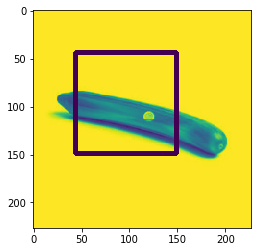

In [0]:
trig = 6

img = np.reshape(xtest[trig], (227,227))
plt.imshow(img)

box = pont[trig]

h = int(box[2] * 227)
w = int(box[3] * 227)
xmid = int(box[0] * 227)
ymid = int(box[1] * 227)

ymax = int(ymid + h/2)
ymin = int(ymid - h/2)

xmax = int(xmid + w/2)
xmin = int(xmid - w/2)

cv2.rectangle(img,(xmin,ymax),(ymax,xmin),(0,255,0),3)

plt.imshow(img)
if classifcation[trig] == 0:
    name = 'cucmber'
elif classifcation[trig] == 1:
    name = 'eggplant'
elif classifcation[trig] == 2:
    name = 'mushroom'

print(name)

In [0]:
!nvidia-smi

In [0]:
#!kill process_id

!ps -aux|grep python
!kill -9 -1

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn't guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()